In [55]:
!pip install vaderSentiment

In [2]:
from IPython import display
import math
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [39]:
import pandas as pd
import numpy as np

In [5]:
import string

In [6]:
import re

In [7]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
import pandas as pd
data = pd.read_csv("news_data_aapl.csv")
data = data.dropna()
print(data.head())

   Unnamed: 0   TimeStamp                                           Headline
0           0  2022-06-23  Swiss detail revenue split for global minimum ...
1           1  2022-06-22  Meta and other tech giants form metaverse stan...
2           2  2022-06-22  Shopify unveils new tools, Twitter tie-up to b...
3           3  2022-06-22  Volkswagen CEO questions whether Apple plans t...
4           4  2022-06-21         Wall Street gains over 2% in broad rebound


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tanmay'PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
from nltk.corpus import stopwords

In [9]:
data.drop(data.filter(regex="Unnamed"),axis=1, inplace=True)

In [10]:
data[["Headline"]]
data["Headline"] = data["Headline"].astype(str)
data.head()

,TimeStamp,Headline
0,2022-06-23,Swiss detail revenue split for global minimum ...
1,2022-06-22,Meta and other tech giants form metaverse stan...
2,2022-06-22,"Shopify unveils new tools, Twitter tie-up to b..."
3,2022-06-22,Volkswagen CEO questions whether Apple plans t...
4,2022-06-21,Wall Street gains over 2% in broad rebound


In [11]:
data["Headline"] = data["Headline"].str.lower()
data.head()

,TimeStamp,Headline
0,2022-06-23,swiss detail revenue split for global minimum ...
1,2022-06-22,meta and other tech giants form metaverse stan...
2,2022-06-22,"shopify unveils new tools, twitter tie-up to b..."
3,2022-06-22,volkswagen ceo questions whether apple plans t...
4,2022-06-21,wall street gains over 2% in broad rebound


In [12]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

data["Headline"] = data["Headline"].apply(lambda text: remove_punctuation(text))
data.head()

,TimeStamp,Headline
0,2022-06-23,swiss detail revenue split for global minimum ...
1,2022-06-22,meta and other tech giants form metaverse stan...
2,2022-06-22,shopify unveils new tools twitter tieup to bea...
3,2022-06-22,volkswagen ceo questions whether apple plans t...
4,2022-06-21,wall street gains over 2 in broad rebound


In [13]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [14]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data["Headline"] = data["Headline"].apply(lambda text: remove_stopwords(text))
data.head()

,TimeStamp,Headline
0,2022-06-23,swiss detail revenue split global minimum tax ...
1,2022-06-22,meta tech giants form metaverse standards body...
2,2022-06-22,shopify unveils new tools twitter tieup beat e...
3,2022-06-22,volkswagen ceo questions whether apple plans p...
4,2022-06-21,wall street gains 2 broad rebound


In [15]:
from nltk.stem.porter import PorterStemmer

In [44]:
stemmer = PorterStemmer()
""""
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

data["Headline"] = data["Headline"].apply(lambda text: stem_words(text))
data.head() """

'"\ndef stem_words(text):\n    return " ".join([stemmer.stem(word) for word in text.split()])\n\ndata["Headline"] = data["Headline"].apply(lambda text: stem_words(text))\ndata.head() '

In [16]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Headline"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Headline"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Headline"]]
data['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data["Headline"]]
data.head()

,TimeStamp,Headline,Positive,Negative,Neutral,Compound
0,2022-06-23,swiss detail revenue split global minimum tax ...,0.000,0.0,1.000,0.00
1,2022-06-22,meta tech giants form metaverse standards body...,0.000,0.0,1.000,0.00
2,2022-06-22,shopify unveils new tools twitter tieup beat e...,0.000,0.0,1.000,0.00
3,2022-06-22,volkswagen ceo questions whether apple plans p...,0.000,0.0,1.000,0.00
4,2022-06-21,wall street gains 2 broad rebound,0.375,0.0,0.625,0.34


In [17]:
score = data["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append(1)
    elif i <= -0.05 :
        sentiment.append(-1)
    else:
        sentiment.append(0)
data["Sentiment"] = sentiment
data.head()

,TimeStamp,Headline,Positive,Negative,Neutral,Compound,Sentiment
0,2022-06-23,swiss detail revenue split global minimum tax ...,0.000,0.0,1.000,0.00,0
1,2022-06-22,meta tech giants form metaverse standards body...,0.000,0.0,1.000,0.00,0
2,2022-06-22,shopify unveils new tools twitter tieup beat e...,0.000,0.0,1.000,0.00,0
3,2022-06-22,volkswagen ceo questions whether apple plans p...,0.000,0.0,1.000,0.00,0
4,2022-06-21,wall street gains 2 broad rebound,0.375,0.0,0.625,0.34,1


In [18]:
print(data["Sentiment"].value_counts())

 0    11277
 1     8584
-1     5055
Name: Sentiment, dtype: int64


In [19]:
print(data.groupby(['Sentiment']).count())

           TimeStamp  Headline  Positive  Negative  Neutral  Compound
Sentiment                                                            
-1              5055      5055      5055      5055     5055      5055
 0             11277     11277     11277     11277    11277     11277
 1              8584      8584      8584      8584     8584      8584


In [20]:
data.Sentiment.value_counts()/len(data)

 0    0.452601
 1    0.344518
-1    0.202882
Name: Sentiment, dtype: float64

In [21]:
data[data.Sentiment==0]

,TimeStamp,Headline,Positive,Negative,Neutral,Compound,Sentiment
0,2022-06-23,swiss detail revenue split global minimum tax ...,0.0,0.0,1.0,0.0,0
1,2022-06-22,meta tech giants form metaverse standards body...,0.0,0.0,1.0,0.0,0
2,2022-06-22,shopify unveils new tools twitter tieup beat e...,0.0,0.0,1.0,0.0,0
3,2022-06-22,volkswagen ceo questions whether apple plans p...,0.0,0.0,1.0,0.0,0
5,2022-06-21,meta tech giants form metaverse standards body...,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...
24911,2012-07-16,waiting direction markets,0.0,0.0,1.0,0.0,0
24912,2012-07-19,mid year update u canadian stock markets sector,0.0,0.0,1.0,0.0,0
24913,2012-07-23,summer heat scorches europe u,0.0,0.0,1.0,0.0,0
24914,2012-07-23,apple earnings preview quarterly dip deck,0.0,0.0,1.0,0.0,0


In [22]:
data = data[data.Sentiment != 0]


In [23]:
data

,TimeStamp,Headline,Positive,Negative,Neutral,Compound,Sentiment
4,2022-06-21,wall street gains 2 broad rebound,0.375,0.000,0.625,0.3400,1
6,2022-06-21,us stockswall street gains 2 broad rebound,0.324,0.000,0.676,0.3400,1
7,2022-06-21,us stocksmegacap energy shares lead resurgent ...,0.417,0.000,0.583,0.5106,1
8,2022-06-21,us stocksmegacap energy shares lead broad wall...,0.381,0.000,0.619,0.5106,1
9,2022-06-21,us stockstech energy shares boost wall st bear...,0.500,0.000,0.500,0.7184,1
...,...,...,...,...,...,...,...
24899,2012-08-10,good knight public markets,0.492,0.000,0.508,0.4404,1
24901,2012-08-14,largest usa tech companies earnings plunge app...,0.130,0.000,0.870,0.0516,1
24906,2012-07-29,use abuse weekly options,0.000,0.583,0.417,-0.6369,-1
24908,2012-07-30,bulls snatch victory jaws defeat,0.000,0.429,0.571,-0.4588,-1


In [24]:
data.drop(['Positive', 'Negative', 'Neutral', 'Compound'], axis = 1)

,TimeStamp,Headline,Sentiment
4,2022-06-21,wall street gains 2 broad rebound,1
6,2022-06-21,us stockswall street gains 2 broad rebound,1
7,2022-06-21,us stocksmegacap energy shares lead resurgent ...,1
8,2022-06-21,us stocksmegacap energy shares lead broad wall...,1
9,2022-06-21,us stockstech energy shares boost wall st bear...,1
...,...,...,...
24899,2012-08-10,good knight public markets,1
24901,2012-08-14,largest usa tech companies earnings plunge app...,1
24906,2012-07-29,use abuse weekly options,-1
24908,2012-07-30,bulls snatch victory jaws defeat,-1


In [25]:
corpus=[]
for val in data['Headline']:
    corpus.append(val)

In [26]:
corpus

['wall street gains 2 broad rebound',
 'us stockswall street gains 2 broad rebound',
 'us stocksmegacap energy shares lead resurgent wall street',
 'us stocksmegacap energy shares lead broad wall street rebound',
 'us stockstech energy shares boost wall st bear market rally',
 'us stockswall street bounces growth energy stocks jump',
 'us stockswall street set strong open bruising week',
 'us stocksfutures jump worst week sp 500 since march 2020',
 'biden says proud apple workers voted join union',
 'update 1biden says proud apple workers voted join union',
 'biden says proud apple workers voted join union',
 'china power demand sets new records heatwaves bake northern cities',
 'update 1china power demand sets new records heatwaves bake northern cities',
 'update 2taiwan may export orders return growth uncertainly ahead',
 'power demand parts china sets new records amid searing heat',
 'warren buffett charity lunch fetches record winning bid 19 million',
 'update 5warren buffett chari

In [29]:
print("Positive headlines:\n")
pprint(list(data[data['Sentiment'] == 1].Headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(data[data['Sentiment'] == -1].Headline)[:5], width=200)


Positive headlines:

['wall street gains 2 broad rebound',
 'us stockswall street gains 2 broad rebound',
 'us stocksmegacap energy shares lead resurgent wall street',
 'us stocksmegacap energy shares lead broad wall street rebound',
 'us stockstech energy shares boost wall st bear market rally']

Negative headlines:

['us stocksfutures jump worst week sp 500 since march 2020',
 'china power demand sets new records heatwaves bake northern cities',
 'update 1china power demand sets new records heatwaves bake northern cities',
 'power demand parts china sets new records amid searing heat',
 'eu fails agree corporate tax reform hungary vetoes overhaul']


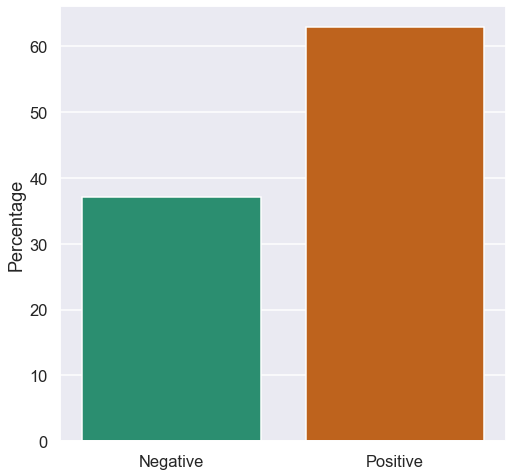

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = data.Sentiment.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [35]:
feature_vector =  cv.fit(data.Headline)

In [36]:
data_features =  cv.transform(data.Headline)

In [37]:
features = feature_vector.get_feature_names()

c:\Users\Tanmay'PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
features_counts = np.sum(data_features.toarray(), axis = 0)

In [41]:
features_counts = pd.DataFrame(dict(features =  features, counts = features_counts))

In [42]:
features_counts.sort_values("counts", ascending= False)[0:15]

,features,counts
93,apple,2549
396,earnings,1413
1198,stocks,1258
1197,stock,1008
1330,us,920
1284,top,736
574,growth,685
1260,tech,645
73,amazon,605
246,china,599


In [43]:
analyzer = CountVectorizer().build_analyzer()

In [46]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y =  train_test_split(data_features, data.Sentiment, 
                                                     test_size = 0.3, random_state = 42)

In [47]:
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB()
nb_clf.fit(train_x.toarray(), train_y)

BernoulliNB()

In [48]:
data_predicted = nb_clf.predict(test_x.toarray())

In [50]:
from sklearn import metrics
print(metrics.classification_report(test_y,data_predicted))

              precision    recall  f1-score   support

          -1       0.81      0.78      0.79      1522
           1       0.87      0.89      0.88      2570

    accuracy                           0.85      4092
   macro avg       0.84      0.84      0.84      4092
weighted avg       0.85      0.85      0.85      4092



<AxesSubplot:>

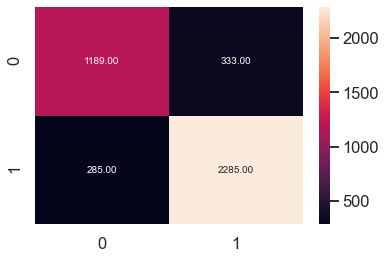

In [52]:
cm = metrics.confusion_matrix(test_y, data_predicted)
sns.heatmap(cm, annot=True, fmt = '.2f')

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, data_predicted)

0.8489736070381232

In [56]:
data

,TimeStamp,Headline,Positive,Negative,Neutral,Compound,Sentiment
4,2022-06-21,wall street gains 2 broad rebound,0.375,0.000,0.625,0.3400,1
6,2022-06-21,us stockswall street gains 2 broad rebound,0.324,0.000,0.676,0.3400,1
7,2022-06-21,us stocksmegacap energy shares lead resurgent ...,0.417,0.000,0.583,0.5106,1
8,2022-06-21,us stocksmegacap energy shares lead broad wall...,0.381,0.000,0.619,0.5106,1
9,2022-06-21,us stockstech energy shares boost wall st bear...,0.500,0.000,0.500,0.7184,1
...,...,...,...,...,...,...,...
24899,2012-08-10,good knight public markets,0.492,0.000,0.508,0.4404,1
24901,2012-08-14,largest usa tech companies earnings plunge app...,0.130,0.000,0.870,0.0516,1
24906,2012-07-29,use abuse weekly options,0.000,0.583,0.417,-0.6369,-1
24908,2012-07-30,bulls snatch victory jaws defeat,0.000,0.429,0.571,-0.4588,-1
